### Problem Definition

- A binary classification problem to predict whether a passenger on a titanic ship will survive the incident or not.

### Data collection
- The data was gotten from kaggle machine learning repository. click here to download the data https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv

### Data cleaning
- The data was cleaned and preprocessed using pandas and scikit-learn python libraries.

### Feature Scaling
- The features will be scaled using Standard scaler.

### Model building
- We will build the model using Logistic Regression.

### Evaluation
- The evaluation metrics used are accuracy score, f1 score, precision score, confusion matrix, and classification report. 

#### Visualization library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the dataset

In [2]:
titanic_df = pd.read_csv('data/train.csv', index_col = "PassengerId")

#view the data
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = titanic_df.copy()

In [4]:
data.drop('Name', axis = 1, inplace=True)

#view the dataset
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)

In [5]:
data.shape

(891, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


<AxesSubplot:>

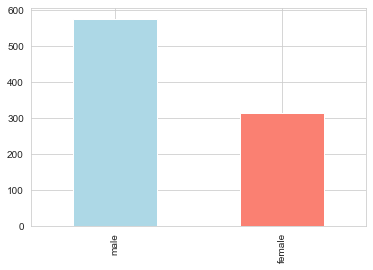

In [7]:
data['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Conclusion: Female has higher chances of survival on average compared to the Male.

In [10]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Conclusion: The 1st class passengers has higher chances of survival.

In [12]:
data.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning and preprocessing

In [14]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data.shape[0]

891

In [16]:
data = data.drop(['Cabin', 'Ticket'], axis=1)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Filling missing values

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [18]:
Age_median = data['Age'].median()
Age_median

28.0

In [19]:
data['Age'] = data['Age'].fillna(Age_median, axis=0)

In [20]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
Embarked_mode = data['Embarked'].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [22]:
data['Embarked'] = data['Embarked'].fillna(method='bfill', axis=0)

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


### Feature Selection

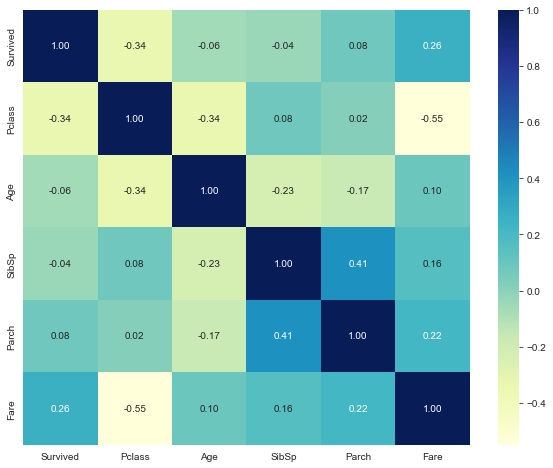

In [24]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           fmt='.2f',
           annot=True,
           cmap='YlGnBu')
plt.show()

In [25]:
data = data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S


In [26]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


### Outlier Detection and removal

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S


In [28]:
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [29]:
#Reordering of the columns
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']

data = data[columns]
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,S,0
2,1,female,38.0,1,0,C,1
3,3,female,26.0,0,0,S,1
4,1,female,35.0,1,0,S,1
5,3,male,35.0,0,0,S,0


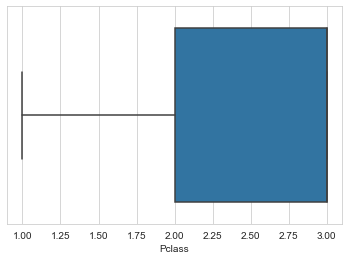

In [30]:
sns.boxplot(data = data,
           x = 'Pclass')
plt.show()

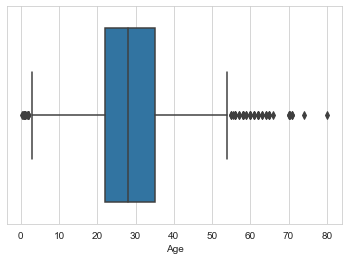

In [31]:
sns.boxplot(data=data,
           x = 'Age')
plt.show()

In [32]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
Q1, Q3

(22.0, 35.0)

In [33]:
IQR = Q3 - Q1
IQR

13.0

In [34]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(2.5, 54.5)

In [35]:
data[(data['Age']> upper_limit)|(data['Age'] < lower_limit)]

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,,
8,3,male,2.00,3,1,S,0
12,1,female,58.00,0,0,S,1
16,2,female,55.00,0,0,S,1
17,3,male,2.00,4,1,Q,0
34,2,male,66.00,0,0,S,0
...,...,...,...,...,...,...,...
828,2,male,1.00,0,2,C,1
830,1,female,62.00,0,0,C,1
832,2,male,0.83,1,1,S,1


In [36]:
data.shape

(891, 7)

In [37]:
data_1 = data[(data['Age']<= upper_limit)& (data['Age'] > lower_limit)]
data_1.shape

(825, 7)

<AxesSubplot:xlabel='SibSp'>

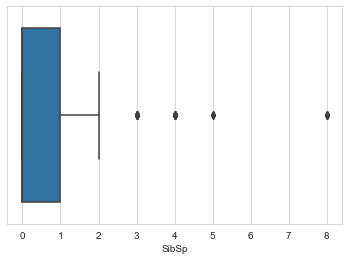

In [38]:
sns.boxplot(data=data_1,
           x = 'SibSp')

In [39]:
Q1 = data_1['SibSp'].quantile(0.25)
Q3 = data_1['SibSp'].quantile(0.75)
Q1, Q3

(0.0, 1.0)

In [40]:
IQR = Q3 - Q1
IQR

1.0

In [41]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.5, 2.5)

In [42]:
data_1[(data_1['SibSp']>upper_limit) | (data_1['SibSp']<lower_limit)]

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,,
25,3,female,8.0,3,1,S,0
28,1,male,19.0,3,2,S,0
51,3,male,7.0,4,1,S,0
60,3,male,11.0,5,2,S,0
64,3,male,4.0,3,2,S,0
69,3,female,17.0,4,2,S,1
72,3,female,16.0,5,2,S,0
86,3,female,33.0,3,0,S,1
89,1,female,23.0,3,2,S,1


In [43]:
data_2 = data_1[(data_1['SibSp']<=upper_limit) & (data_1['SibSp']>lower_limit)]
data_2.shape

(786, 7)

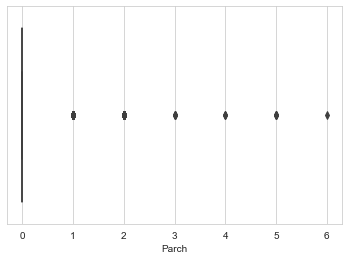

In [44]:
sns.boxplot(data=data_2,
           x = 'Parch')
plt.show()

In [45]:
Q1 = data_2['Parch'].quantile(0.25)
Q3 = data_2['Parch'].quantile(0.75)
Q1, Q3

(0.0, 0.0)

In [46]:
IQR = Q3 - Q1
IQR

0.0

In [47]:
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5
lower_limit, upper_limit

(0.0, 0.0)

In [48]:
data_2[(data_2['Parch']>upper_limit) | (data_2['Parch'] < lower_limit)].shape[0]

144

In [49]:
data_3 = data_2[(data_2['Parch']<=upper_limit) & (data_2['Parch'] <= lower_limit)]
data_3.shape

(642, 7)

In [50]:
new_data = data_3.copy()

In [51]:
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,S,0
2,1,female,38.0,1,0,C,1
3,3,female,26.0,0,0,S,1
4,1,female,35.0,1,0,S,1
5,3,male,35.0,0,0,S,0


In [52]:
new_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [53]:
new_data['Sex'] = new_data['Sex'].map({'male': 1,
                              'female': 0})

new_data['Sex'].unique()

array([1, 0])

In [54]:
new_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [56]:
le = LabelEncoder()
new_data['Embarked'] = le.fit_transform(new_data['Embarked'])

new_data['Embarked'].unique()

array([2, 0, 1])

In [57]:
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
PassengerId,,,,,,,
1,3,1,22.0,1,0,2,0
2,1,0,38.0,1,0,0,1
3,3,0,26.0,0,0,2,1
4,1,0,35.0,1,0,2,1
5,3,1,35.0,0,0,2,0


In [58]:
new_data['Survived'].value_counts(normalize=True)

0    0.655763
1    0.344237
Name: Survived, dtype: float64

In [59]:
#split the dataset into features and labels
X = new_data.drop('Survived', axis=1)
y = new_data['Survived']

In [60]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22.0,1,0,2
2,1,0,38.0,1,0,0
3,3,0,26.0,0,0,2
4,1,0,35.0,1,0,2
5,3,1,35.0,0,0,2


In [61]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Feature Scaling

In [62]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [63]:
X_scaled = sc.transform(X)
X_scaled

array([[ 0.78088025,  0.63383494, -0.86823702,  1.58351966,  0.        ,
         0.59427199],
       [-1.65273685, -1.57769783,  0.96647408,  1.58351966,  0.        ,
        -1.9662825 ],
       [ 0.78088025, -1.57769783, -0.40955924, -0.49545707,  0.        ,
         0.59427199],
       ...,
       [-1.65273685, -1.57769783, -1.21224535, -0.49545707,  0.        ,
         0.59427199],
       [-1.65273685,  0.63383494, -0.40955924, -0.49545707,  0.        ,
        -1.9662825 ],
       [ 0.78088025,  0.63383494,  0.27845742, -0.49545707,  0.        ,
        -0.68600525]])

#### Model building

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [65]:
#split the features into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((513, 6), (129, 6), (513,), (129,))

In [67]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [68]:
reg.score(X_test,y_test)

0.813953488372093

In [69]:
reg.score(X_train, y_train)

0.8148148148148148

### Evaluation

In [70]:
y_pred = reg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [71]:
y_pred_proba = reg.predict_proba(X_test)
y_pred_proba[:10]

array([[0.85267538, 0.14732462],
       [0.32628318, 0.67371682],
       [0.81249486, 0.18750514],
       [0.67705409, 0.32294591],
       [0.92274342, 0.07725658],
       [0.92449413, 0.07550587],
       [0.44384174, 0.55615826],
       [0.9357614 , 0.0642386 ],
       [0.48600483, 0.51399517],
       [0.3929869 , 0.6070131 ]])

In [72]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.813953488372093

In [73]:
print("The accuracy score of the Logistic regression model is: {0:.2f}%".format(accuracy_score*100))

The accuracy score of the Logistic regression model is: 81.40%


In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[74  6]
 [18 31]]


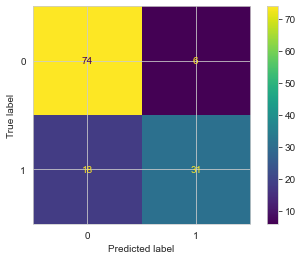

In [75]:
display = ConfusionMatrixDisplay(cm, display_labels=reg.classes_)
display.plot();